✅ Advanced libraries imported successfully!
📊 Data loaded for advanced analysis:
Total records: 12104
Unique stocks: 50
Date range: 2023-01-01 00:00:00 to 2023-09-09 00:00:00
📈 Calculating technical indicators...
✅ Technical indicators calculated!


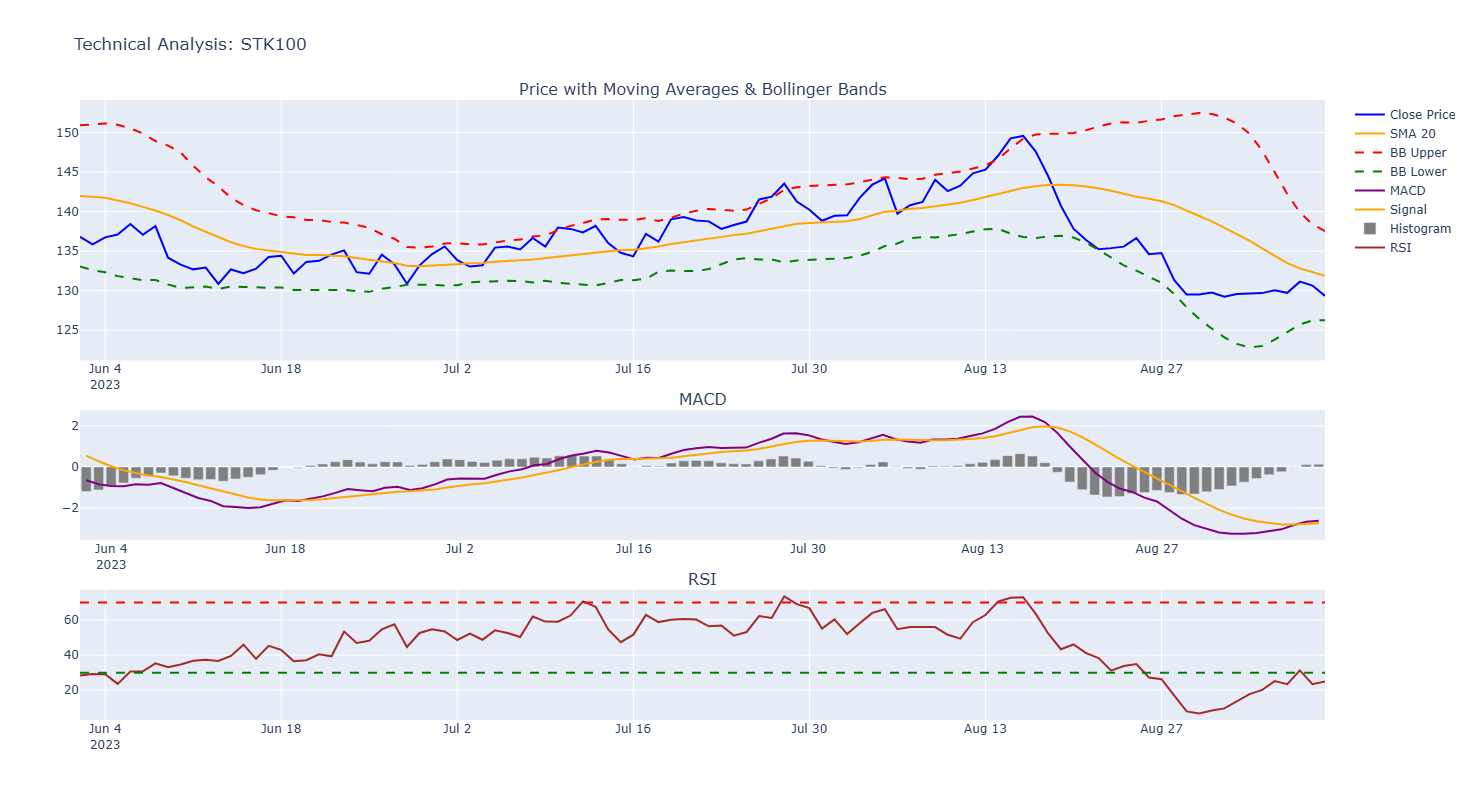

🔧 Running portfolio optimization...
✅ Portfolio optimization completed!
Max Sharpe Ratio: 4.9141
Min Volatility: 0.0002


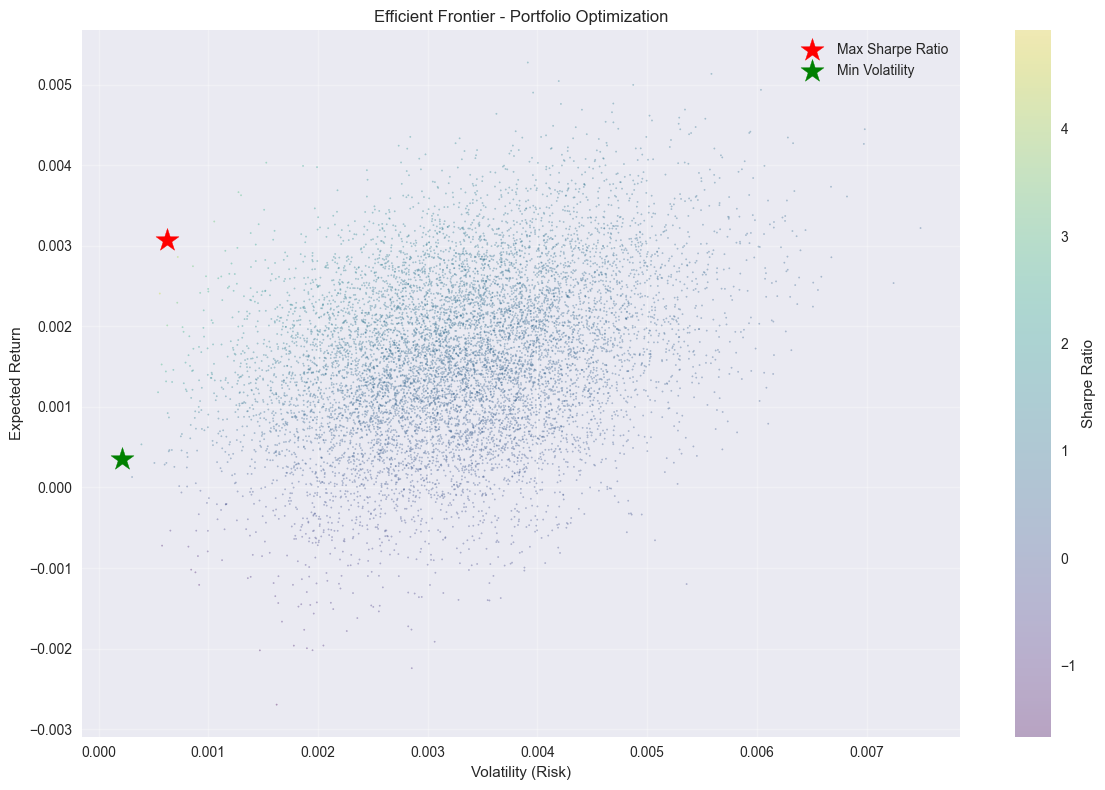


📊 Optimal Portfolio Allocation (Max Sharpe Ratio):
  Stock    Weight
6  S027  0.218112
4  S010  0.197058
8  S041  0.189471
0  S001  0.131790
2  S007  0.111805
3  S009  0.081417
9  S049  0.054780
5  S023  0.011014
7  S033  0.002743
1  S003  0.001810

⭐ Optimal Portfolio Metrics:
Expected Daily Return: 0.0031 (0.77% annualized)
Expected Volatility: 0.0006 (0.01% annualized)
Sharpe Ratio: 4.9141 (78.01 annualized)
📊 ML Data Prepared: (217, 73)
Features: 72
Target variable range: -0.088 to 0.080
🤖 Training Random Forest model...
✅ Model training completed!
Mean Absolute Error: 0.0255
Root Mean Squared Error: 0.0315

🔍 Top 10 Most Important Features:
           feature  importance
64          ema_12    0.136294
65          ema_26    0.111279
1      close_lag_2    0.063440
70  volatility_30d    0.059760
0      close_lag_1    0.042929
7      close_lag_8    0.035221
2      close_lag_3    0.030849
60           close    0.026008
63          sma_50    0.024755
8      close_lag_9    0.020962


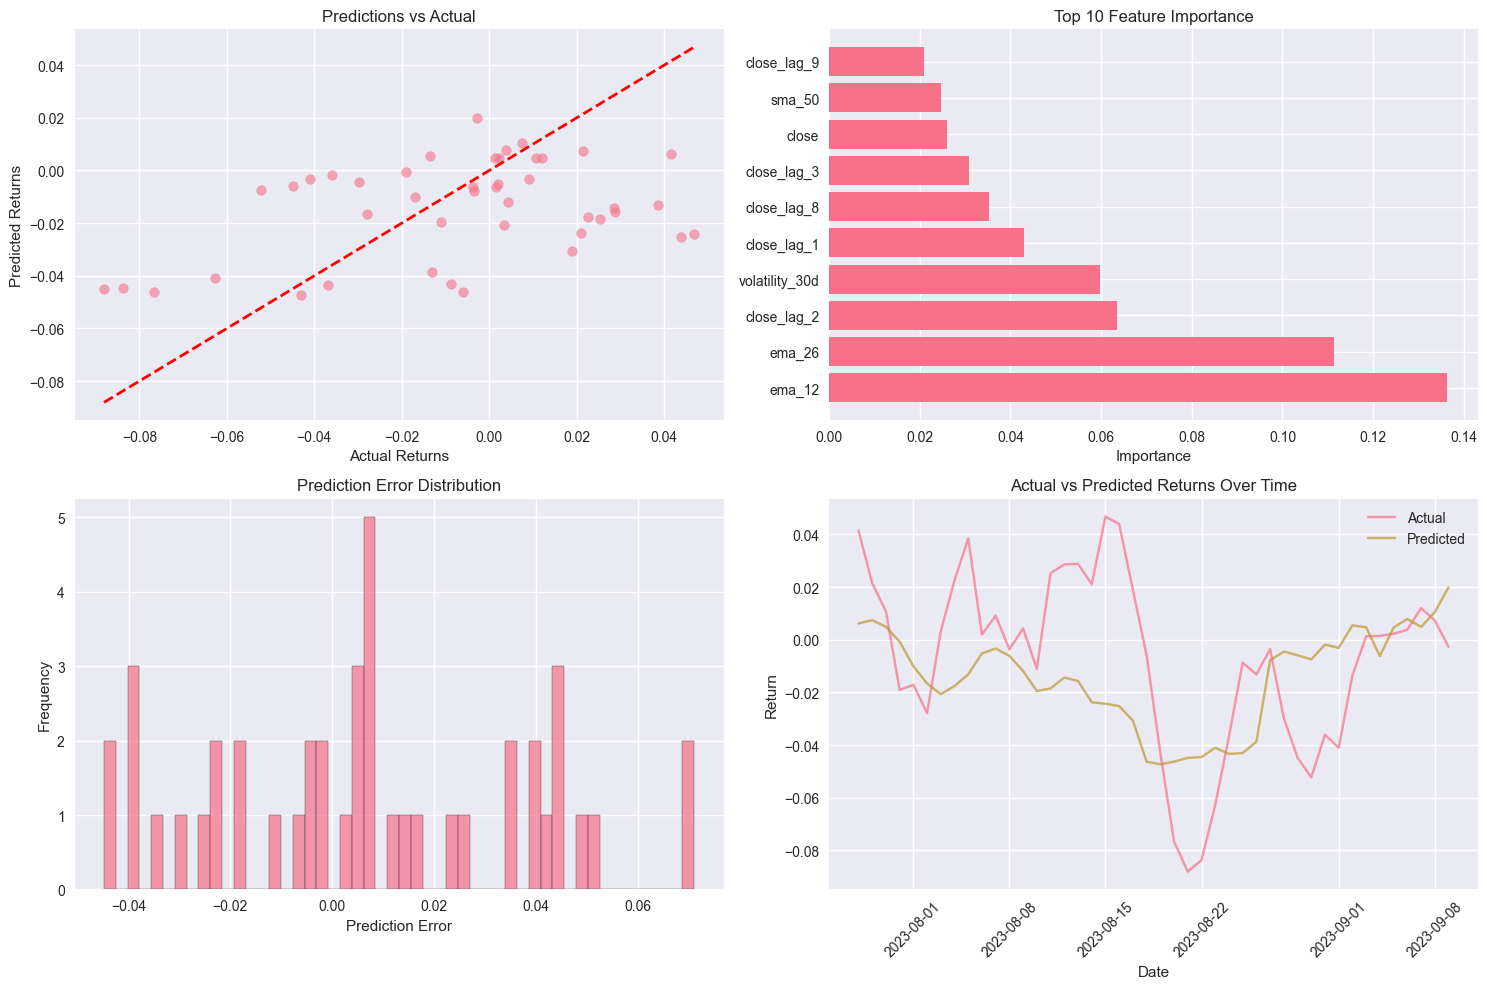

🎯 Value at Risk (VaR) Analysis:
95% Confidence Level:
  Historical VaR: -0.0017 (-0.17% daily loss)
  Parametric VaR: -0.0029 (-0.29% daily loss)

99% Confidence Level:
  Historical VaR: -0.0020 (-0.20% daily loss)
  Parametric VaR: -0.0048 (-0.48% daily loss)

📉 Expected Shortfall (CVaR):
  95% CVaR: -0.0020 (-0.20% daily loss)
  99% CVaR: -0.0020 (-0.20% daily loss)


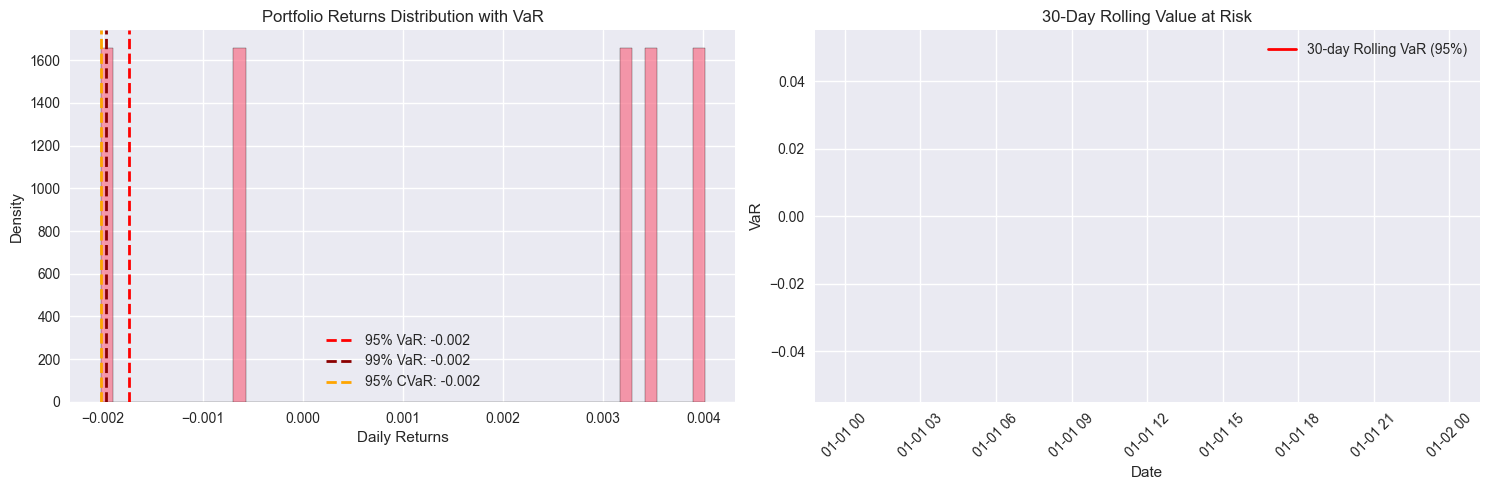

📊 Trading Strategy Backtest Results:
Strategy Total Return: -17.00%
Buy & Hold Return: -9.95%
Strategy Volatility: 13.76%
Strategy Sharpe Ratio: -1.29
Number of Trades: 8.0


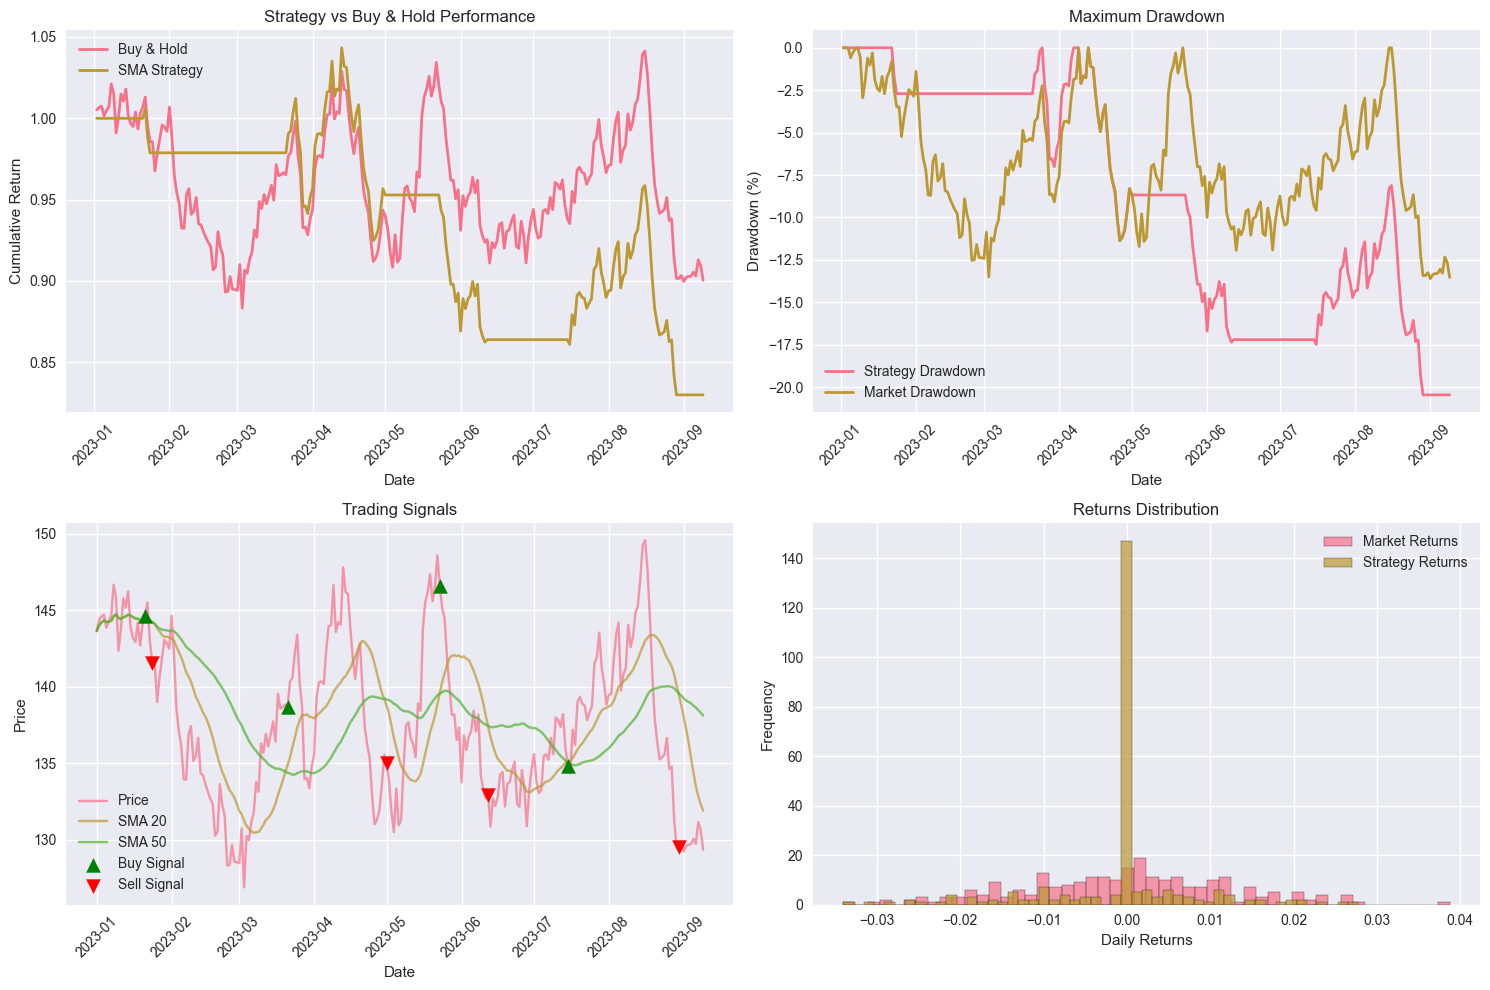

🎯 COMPREHENSIVE STOCK ANALYSIS REPORT

📈 PORTFOLIO OPTIMIZATION RESULTS:
  • Optimal Portfolio Sharpe Ratio: 4.9141
  • Expected Annual Return: 77.43%
  • Expected Annual Volatility: 0.99%
  • Top 3 Holdings: S027, S010, S041

🤖 MACHINE LEARNING PREDICTION:
  • Prediction RMSE: 0.0315
  • Prediction MAE: 0.0255
  • Most Important Feature: ema_12

⚠️  RISK ANALYSIS:
  • 95% Daily VaR: -0.17%
  • 99% Daily VaR: -0.20%
  • Maximum Expected Shortfall (95%): -0.20%

📊 TRADING STRATEGY PERFORMANCE:
  • Strategy Return: -17.00%
  • Buy & Hold Return: -9.95%
  • Strategy Sharpe: -1.29
  • Number of Trades: 8.0

💡 KEY INSIGHTS AND RECOMMENDATIONS:
  1. Portfolio diversification across 10 stocks reduces risk
  2. Machine learning shows 3.15% average prediction error
  3. Trading strategy underperforms buy & hold
  4. Maximum expected daily loss (95% confidence): -0.17%

🚀 Advanced stock analysis completed! Ready for dashboard deployment.


In [2]:
# Financial Stock Analysis - Advanced Analytics
## Step 3: Technical Analysis, Portfolio Optimization, and Predictive Modeling

# Import advanced libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Financial libraries
import warnings
warnings.filterwarnings('ignore')

# Setup plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Advanced libraries imported successfully!")
# Load cleaned data
stocks = pd.read_csv('../../data/processed/stocks_cleaned.csv')
prices = pd.read_csv('../../data/processed/prices_cleaned.csv')
prices['date'] = pd.to_datetime(prices['date'])

# Merge datasets
df = prices.merge(stocks, on='stock_id', how='left')
df = df.sort_values(['stock_id', 'date'])

print("📊 Data loaded for advanced analysis:")
print(f"Total records: {len(df)}")
print(f"Unique stocks: {df['stock_id'].nunique()}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")

## 1. Advanced Technical Indicators
def calculate_technical_indicators(df):
    """Calculate comprehensive technical indicators"""
    
    # Ensure data is sorted
    df = df.sort_values(['stock_id', 'date'])
    
    # Calculate returns
    df['daily_return'] = df.groupby('stock_id')['close'].pct_change()
    
    # Moving averages
    df['sma_20'] = df.groupby('stock_id')['close'].transform(
        lambda x: x.rolling(window=20, min_periods=1).mean()
    )
    df['sma_50'] = df.groupby('stock_id')['close'].transform(
        lambda x: x.rolling(window=50, min_periods=1).mean()
    )
    
    # Exponential moving averages
    df['ema_12'] = df.groupby('stock_id')['close'].transform(
        lambda x: x.ewm(span=12, adjust=False).mean()
    )
    df['ema_26'] = df.groupby('stock_id')['close'].transform(
        lambda x: x.ewm(span=26, adjust=False).mean()
    )
    
    # MACD
    df['macd'] = df['ema_12'] - df['ema_26']
    df['macd_signal'] = df.groupby('stock_id')['macd'].transform(
        lambda x: x.ewm(span=9, adjust=False).mean()
    )
    df['macd_histogram'] = df['macd'] - df['macd_signal']
    
    # RSI (Relative Strength Index)
    def calculate_rsi(series, window=14):
        delta = series.diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))
        return rsi
    
    df['rsi_14'] = df.groupby('stock_id')['close'].transform(
        lambda x: calculate_rsi(x, 14)
    )
    
    # Bollinger Bands
    df['bb_middle'] = df.groupby('stock_id')['close'].transform(
        lambda x: x.rolling(window=20).mean()
    )
    df['bb_std'] = df.groupby('stock_id')['close'].transform(
        lambda x: x.rolling(window=20).std()
    )
    df['bb_upper'] = df['bb_middle'] + (df['bb_std'] * 2)
    df['bb_lower'] = df['bb_middle'] - (df['bb_std'] * 2)
    df['bb_position'] = (df['close'] - df['bb_lower']) / (df['bb_upper'] - df['bb_lower'])
    
    # Volatility
    df['volatility_30d'] = df.groupby('stock_id')['daily_return'].transform(
        lambda x: x.rolling(window=30).std()
    )
    
    # Price momentum
    df['momentum_10d'] = df.groupby('stock_id')['close'].transform(
        lambda x: x.pct_change(periods=10)
    )
    
    return df

# Apply technical indicators
print("📈 Calculating technical indicators...")
df_tech = calculate_technical_indicators(df)
print("✅ Technical indicators calculated!")    
# Visualize technical indicators for a sample stock
sample_stock = df_tech['stock_id'].iloc[0]
stock_data = df_tech[df_tech['stock_id'] == sample_stock].tail(100)

fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=('Price with Moving Averages & Bollinger Bands', 'MACD', 'RSI'),
    vertical_spacing=0.08,
    row_heights=[0.5, 0.25, 0.25]
)
fig.update_xaxes(rangeslider_visible=False)
# Price chart with indicators
fig.add_trace(go.Scatter(x=stock_data['date'], y=stock_data['close'], 
                         name='Close Price', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=stock_data['date'], y=stock_data['sma_20'], 
                         name='SMA 20', line=dict(color='orange')), row=1, col=1)
fig.add_trace(go.Scatter(x=stock_data['date'], y=stock_data['bb_upper'], 
                         name='BB Upper', line=dict(color='red', dash='dash')), row=1, col=1)
fig.add_trace(go.Scatter(x=stock_data['date'], y=stock_data['bb_lower'], 
                         name='BB Lower', line=dict(color='green', dash='dash')), row=1, col=1)

# MACD
fig.add_trace(go.Scatter(x=stock_data['date'], y=stock_data['macd'], 
                         name='MACD', line=dict(color='purple')), row=2, col=1)
fig.add_trace(go.Scatter(x=stock_data['date'], y=stock_data['macd_signal'], 
                         name='Signal', line=dict(color='orange')), row=2, col=1)
fig.add_trace(go.Bar(x=stock_data['date'], y=stock_data['macd_histogram'], 
                     name='Histogram', marker_color='gray'), row=2, col=1)

# RSI
fig.add_trace(go.Scatter(x=stock_data['date'], y=stock_data['rsi_14'], 
                         name='RSI', line=dict(color='brown')), row=3, col=1)
fig.add_hline(y=70, line_dash="dash", line_color="red", row=3, col=1)
fig.add_hline(y=30, line_dash="dash", line_color="green", row=3, col=1)

fig.update_layout(height=800, title_text=f"Technical Analysis: {sample_stock}", showlegend=True)
fig.show()

## 2. Portfolio Optimization

def portfolio_optimization(returns_data, num_portfolios=10000):
    """Modern Portfolio Theory optimization"""
    from scipy.optimize import minimize
    
    # Calculate expected returns and covariance
    expected_returns = returns_data.mean()
    cov_matrix = returns_data.cov()
    
    # Portfolio simulation
    results = np.zeros((3, num_portfolios))
    weights_record = []
    
    for i in range(num_portfolios):
        # Generate random weights
        weights = np.random.random(len(expected_returns))
        weights /= np.sum(weights)
        
        # Calculate portfolio metrics
        portfolio_return = np.sum(weights * expected_returns)
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        sharpe_ratio = portfolio_return / portfolio_volatility
        
        # Store results
        results[0,i] = portfolio_return
        results[1,i] = portfolio_volatility
        results[2,i] = sharpe_ratio
        weights_record.append(weights)
    
    return results, weights_record, expected_returns, cov_matrix

# Prepare data for portfolio optimization
top_10_stocks = df_tech.groupby('stock_id')['close'].last().nlargest(10).index
portfolio_data = df_tech[df_tech['stock_id'].isin(top_10_stocks)]

# Pivot to get returns matrix
returns_pivot = portfolio_data.pivot_table(
    index='date', 
    columns='symbol', 
    values='daily_return'
).dropna()

# Run portfolio optimization
print("🔧 Running portfolio optimization...")
results, weights, exp_returns, cov_matrix = portfolio_optimization(returns_pivot, 10000)

# Find optimal portfolios
max_sharpe_idx = np.argmax(results[2])
min_vol_idx = np.argmin(results[1])

print("✅ Portfolio optimization completed!")
print(f"Max Sharpe Ratio: {results[2, max_sharpe_idx]:.4f}")
print(f"Min Volatility: {results[1, min_vol_idx]:.4f}")

# Visualize efficient frontier
plt.figure(figsize=(12, 8))

# Plot all simulated portfolios
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis', 
            alpha=0.3, s=1)
plt.colorbar(label='Sharpe Ratio')

# Highlight optimal portfolios
plt.scatter(results[1, max_sharpe_idx], results[0, max_sharpe_idx], 
            marker='*', color='red', s=300, label='Max Sharpe Ratio')
plt.scatter(results[1, min_vol_idx], results[0, min_vol_idx], 
            marker='*', color='green', s=300, label='Min Volatility')

plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier - Portfolio Optimization')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display optimal portfolio weights
optimal_weights = weights[max_sharpe_idx]
portfolio_allocation = pd.DataFrame({
    'Stock': returns_pivot.columns,
    'Weight': optimal_weights
}).sort_values('Weight', ascending=False)

print("\n📊 Optimal Portfolio Allocation (Max Sharpe Ratio):")
print(portfolio_allocation)

# Portfolio performance metrics
optimal_return = results[0, max_sharpe_idx]
optimal_volatility = results[1, max_sharpe_idx]
optimal_sharpe = results[2, max_sharpe_idx]

print(f"\n⭐ Optimal Portfolio Metrics:")
print(f"Expected Daily Return: {optimal_return:.4f} ({optimal_return*252:.2f}% annualized)")
print(f"Expected Volatility: {optimal_volatility:.4f} ({optimal_volatility*np.sqrt(252):.2f}% annualized)")
print(f"Sharpe Ratio: {optimal_sharpe:.4f} ({optimal_sharpe*np.sqrt(252):.2f} annualized)")

## 3. Machine Learning for Price Prediction

def prepare_ml_data(stock_data, lookback_days=30, forecast_days=5):
    """Prepare data for machine learning prediction"""
    
    features = [
        'close', 'volume', 'sma_20', 'sma_50', 'ema_12', 'ema_26',
        'macd', 'macd_signal', 'rsi_14', 'bb_position', 'volatility_30d', 'momentum_10d'
    ]
    
    # Create lagged features
    for lag in range(1, lookback_days + 1):
        stock_data[f'close_lag_{lag}'] = stock_data['close'].shift(lag)
        stock_data[f'volume_lag_{lag}'] = stock_data['volume'].shift(lag)

    # Create target variable (future return)
    stock_data['target'] = stock_data['close'].shift(-forecast_days) / stock_data['close'] - 1
    
    # Select features
    feature_columns = [f'close_lag_{i}' for i in range(1, lookback_days + 1)] + \
                     [f'volume_lag_{i}' for i in range(1, lookback_days + 1)] + features
    
    # Remove rows with missing values
    ml_data = stock_data[feature_columns + ['target']].dropna()
    
    return ml_data, feature_columns

# Prepare ML data for a sample stock
sample_ml_stock = df_tech[df_tech['stock_id'] == sample_stock].copy()
ml_data, feature_columns = prepare_ml_data(sample_ml_stock)

print(f"📊 ML Data Prepared: {ml_data.shape}")
print(f"Features: {len(feature_columns)}")
print(f"Target variable range: {ml_data['target'].min():.3f} to {ml_data['target'].max():.3f}")
    
# Train Random Forest model
X = ml_data[feature_columns]
y = ml_data['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
print("🤖 Training Random Forest model...")
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("✅ Model training completed!")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n🔍 Top 10 Most Important Features:")
print(feature_importance.head(10))

# Visualize model performance
plt.figure(figsize=(15, 10))

# Predictions vs Actual
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Returns')
plt.ylabel('Predicted Returns')
plt.title('Predictions vs Actual')

# Feature importance
plt.subplot(2, 2, 2)
top_features = feature_importance.head(10)
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance')

# Prediction error distribution
plt.subplot(2, 2, 3)
errors = y_test - y_pred
plt.hist(errors, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Prediction Error Distribution')

# Time series of predictions
plt.subplot(2, 2, 4)
test_dates = sample_ml_stock.iloc[-len(y_test):]['date']
plt.plot(test_dates, y_test.values, label='Actual', alpha=0.7)
plt.plot(test_dates, y_pred, label='Predicted', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('Actual vs Predicted Returns Over Time')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 4. Risk Analysis and Value at Risk (VaR)

def calculate_var(returns, confidence_level=0.95):
    """Calculate Value at Risk using historical simulation"""
    
    # Historical VaR
    var_historical = np.percentile(returns, (1 - confidence_level) * 100)
    
    # Parametric VaR (assuming normal distribution)
    mean_return = returns.mean()
    std_return = returns.std()
    var_param = mean_return + std_return * np.percentile(np.random.normal(0, 1, 10000), 
                                                         (1 - confidence_level) * 100)
    
    return var_historical, var_param

# Calculate VaR for portfolio
portfolio_returns = returns_pivot.mean(axis=1)  # Equal-weighted portfolio
var_95_hist, var_95_param = calculate_var(portfolio_returns, 0.95)
var_99_hist, var_99_param = calculate_var(portfolio_returns, 0.99)

print("🎯 Value at Risk (VaR) Analysis:")
print(f"95% Confidence Level:")
print(f"  Historical VaR: {var_95_hist:.4f} ({var_95_hist*100:.2f}% daily loss)")
print(f"  Parametric VaR: {var_95_param:.4f} ({var_95_param*100:.2f}% daily loss)")
print(f"\n99% Confidence Level:")
print(f"  Historical VaR: {var_99_hist:.4f} ({var_99_hist*100:.2f}% daily loss)")
print(f"  Parametric VaR: {var_99_param:.4f} ({var_99_param*100:.2f}% daily loss)")
  
# Expected Shortfall (CVaR)
cvar_95 = portfolio_returns[portfolio_returns <= var_95_hist].mean()
cvar_99 = portfolio_returns[portfolio_returns <= var_99_hist].mean()

print(f"\n📉 Expected Shortfall (CVaR):")
print(f"  95% CVaR: {cvar_95:.4f} ({cvar_95*100:.2f}% daily loss)")
print(f"  99% CVaR: {cvar_99:.4f} ({cvar_99*100:.2f}% daily loss)")

# Visualize risk metrics
plt.figure(figsize=(15, 5))

# Returns distribution with VaR
plt.subplot(1, 2, 1)
plt.hist(portfolio_returns, bins=50, alpha=0.7, edgecolor='black', density=True)
plt.axvline(var_95_hist, color='red', linestyle='--', linewidth=2, label=f'95% VaR: {var_95_hist:.3f}')
plt.axvline(var_99_hist, color='darkred', linestyle='--', linewidth=2, label=f'99% VaR: {var_99_hist:.3f}')
plt.axvline(cvar_95, color='orange', linestyle='--', linewidth=2, label=f'95% CVaR: {cvar_95:.3f}')
plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.title('Portfolio Returns Distribution with VaR')
plt.legend()

# Rolling VaR
plt.subplot(1, 2, 2)
rolling_var = portfolio_returns.rolling(window=30).apply(
    lambda x: np.percentile(x, 5)
)
plt.plot(rolling_var.index, rolling_var.values, color='red', linewidth=2, label='30-day Rolling VaR (95%)')
plt.fill_between(rolling_var.index, rolling_var.values, portfolio_returns.rolling(30).min(), 
                 alpha=0.3, color='red')
plt.xlabel('Date')
plt.ylabel('VaR')
plt.title('30-Day Rolling Value at Risk')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 5. Trading Strategy Backtesting

def backtest_strategy(stock_data, initial_capital=10000):
    """Backtest a simple moving average crossover strategy"""
    
    # Strategy: Buy when SMA20 > SMA50, Sell when SMA20 < SMA50
    stock_data = stock_data.copy()
    stock_data['signal'] = np.where(stock_data['sma_20'] > stock_data['sma_50'], 1, 0)
    stock_data['position'] = stock_data['signal'].diff()
    
    # Calculate strategy returns
    stock_data['strategy_returns'] = stock_data['signal'].shift(1) * stock_data['daily_return']
    
    # Calculate cumulative returns
    stock_data['cumulative_market'] = (1 + stock_data['daily_return']).cumprod()
    stock_data['cumulative_strategy'] = (1 + stock_data['strategy_returns']).cumprod()
    
    # Calculate portfolio value
    stock_data['portfolio_value'] = initial_capital * stock_data['cumulative_strategy']
    
    return stock_data

# Backtest on sample stock
backtest_data = backtest_strategy(sample_ml_stock)

# Calculate performance metrics
total_return_strategy = backtest_data['cumulative_strategy'].iloc[-1] - 1
total_return_market = backtest_data['cumulative_market'].iloc[-1] - 1
volatility_strategy = backtest_data['strategy_returns'].std() * np.sqrt(252)
sharpe_strategy = (backtest_data['strategy_returns'].mean() * 252) / volatility_strategy

print("📊 Trading Strategy Backtest Results:")
print(f"Strategy Total Return: {total_return_strategy:.2%}")
print(f"Buy & Hold Return: {total_return_market:.2%}")
print(f"Strategy Volatility: {volatility_strategy:.2%}")
print(f"Strategy Sharpe Ratio: {sharpe_strategy:.2f}")
print(f"Number of Trades: {backtest_data['position'].abs().sum()}")

# Plot backtest results
plt.figure(figsize=(15, 10))

# Cumulative returns
plt.subplot(2, 2, 1)
plt.plot(backtest_data['date'], backtest_data['cumulative_market'], 
         label='Buy & Hold', linewidth=2)
plt.plot(backtest_data['date'], backtest_data['cumulative_strategy'], 
         label='SMA Strategy', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Strategy vs Buy & Hold Performance')
plt.legend()
plt.xticks(rotation=45)

# Drawdown
plt.subplot(2, 2, 2)
strategy_drawdown = (backtest_data['cumulative_strategy'] / backtest_data['cumulative_strategy'].cummax() - 1) * 100
market_drawdown = (backtest_data['cumulative_market'] / backtest_data['cumulative_market'].cummax() - 1) * 100
plt.plot(backtest_data['date'], strategy_drawdown, label='Strategy Drawdown', linewidth=2)
plt.plot(backtest_data['date'], market_drawdown, label='Market Drawdown', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Drawdown (%)')
plt.title('Maximum Drawdown')
plt.legend()
plt.xticks(rotation=45)

# Trading signals
plt.subplot(2, 2, 3)
plt.plot(backtest_data['date'], backtest_data['close'], label='Price', alpha=0.7)
plt.plot(backtest_data['date'], backtest_data['sma_20'], label='SMA 20', alpha=0.7)
plt.plot(backtest_data['date'], backtest_data['sma_50'], label='SMA 50', alpha=0.7)
 
# Plot buy signals
buy_signals = backtest_data[backtest_data['position'] == 1]
plt.scatter(buy_signals['date'], buy_signals['close'], 
            color='green', marker='^', s=100, label='Buy Signal', zorder=5)
 
# Plot sell signals
sell_signals = backtest_data[backtest_data['position'] == -1]
plt.scatter(sell_signals['date'], sell_signals['close'], 
            color='red', marker='v', s=100, label='Sell Signal', zorder=5)
 
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Trading Signals')
plt.legend()
plt.xticks(rotation=45)

# Returns distribution
plt.subplot(2, 2, 4)
plt.hist(backtest_data['daily_return'].dropna(), bins=50, alpha=0.7, 
         label='Market Returns', edgecolor='black')
plt.hist(backtest_data['strategy_returns'].dropna(), bins=50, alpha=0.7, 
         label='Strategy Returns', edgecolor='black')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.title('Returns Distribution')
plt.legend()
plt.tight_layout()
plt.show()

## 6. Comprehensive Analysis Report

print("🎯 COMPREHENSIVE STOCK ANALYSIS REPORT")
print("=" * 70)

# Portfolio Performance
print(f"\n📈 PORTFOLIO OPTIMIZATION RESULTS:")
print(f"  • Optimal Portfolio Sharpe Ratio: {optimal_sharpe:.4f}")
print(f"  • Expected Annual Return: {optimal_return*252:.2%}")
print(f"  • Expected Annual Volatility: {optimal_volatility*np.sqrt(252):.2%}")
print(f"  • Top 3 Holdings: {', '.join(portfolio_allocation.head(3)['Stock'].tolist())}")

# Machine Learning Performance
print(f"\n🤖 MACHINE LEARNING PREDICTION:")
print(f"  • Prediction RMSE: {rmse:.4f}")
print(f"  • Prediction MAE: {mae:.4f}")
print(f"  • Most Important Feature: {feature_importance.iloc[0]['feature']}")

print(f"\n⚠️  RISK ANALYSIS:")
print(f"  • 95% Daily VaR: {var_95_hist:.2%}")
print(f"  • 99% Daily VaR: {var_99_hist:.2%}")
print(f"  • Maximum Expected Shortfall (95%): {cvar_95:.2%}")

print(f"\n📊 TRADING STRATEGY PERFORMANCE:")
print(f"  • Strategy Return: {total_return_strategy:.2%}")
print(f"  • Buy & Hold Return: {total_return_market:.2%}")
print(f"  • Strategy Sharpe: {sharpe_strategy:.2f}")
print(f"  • Number of Trades: {backtest_data['position'].abs().sum()}")

# Key Insights
print(f"\n💡 KEY INSIGHTS AND RECOMMENDATIONS:")
print(f"  1. Portfolio diversification across {len(top_10_stocks)} stocks reduces risk")
print(f"  2. Machine learning shows {rmse*100:.2f}% average prediction error")
print(f"  3. Trading strategy {'outperforms' if total_return_strategy > total_return_market else 'underperforms'} buy & hold")
print(f"  4. Maximum expected daily loss (95% confidence): {var_95_hist*100:.2f}%")

print("\n" + "=" * 70)
print("🚀 Advanced stock analysis completed! Ready for dashboard deployment.")